## Setting up

### Import pandas and read in the csv file and set it to a dataframe called baskets

In [100]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt


###  unanswered questions from last notebook
 - should we remove the duplicates? 
 - what should we do about nulls in the data?

### the remaining questions may need business answer that we are not able to answer by data alone
 - ID columns' statistics make sense other than count, min, max, since they are supposed to be identifiers, should we treat them as categorical?
 - why would some items have price of 0?
 - unique placed_at is one greater than unique order_id, is it possible that two orders are made on exactly the same milisecond? In theory it is possible, but might there be potential fraud?

### plan for this notebook to work on:
 - should we remove the duplicates? 
 - what should we do about nulls in the data?
 - answer some questions regarding merchants:
   - distribution of number of merchants by months
   - distribution of number of merchants by weekday
   - distribution of number of merchants by the number of orders they made
   - distribution of number of merchants by the number of distinct SKUs they buy

### read in data, make columns for date, year, month, day, hour, weekday, from the "placed_at" column 

In [101]:
#filename = 'new_baskets_sample_random_10.csv'
filename = 'new_baskets_sample_top_250.csv'
baskets = pd.read_csv(filename)

In [102]:
import math
baskets.merchant_id.nunique()
math.log(317,2) +1

9.308339030139408

### Simple summaries of one dimension

In [103]:
baskets.price.describe()

count    1.705680e+05
mean     1.357447e+05
std      1.292189e+05
min      1.000000e+00
25%      4.550000e+04
50%      1.060000e+05
75%      1.840000e+05
max      3.825000e+06
Name: price, dtype: float64

<AxesSubplot:>

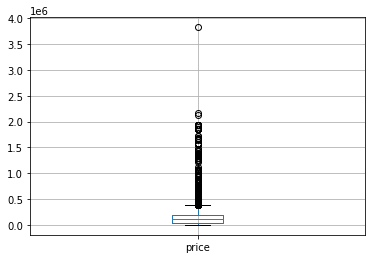

In [104]:
baskets.boxplot(column = 'price')


 - we can immediately see that the price has outliers
 - question: where should we cut to separate outliers from the regular items?

In [105]:
baskets.price

0         150500.0
1         537500.0
2         208000.0
3         461000.0
4          36500.0
            ...   
170563    302500.0
170564    225000.0
170565    225000.0
170566    127000.0
170567    424500.0
Name: price, Length: 170568, dtype: float64

In [106]:
baskets.sku_id.nunique()

1571

<AxesSubplot:>

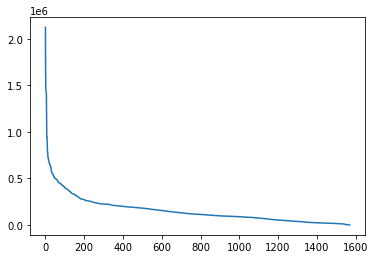

In [107]:
baskets.groupby(by='sku_id')['price'].mean().sort_values(ascending=False).reset_index(drop=True).plot()

<AxesSubplot:>

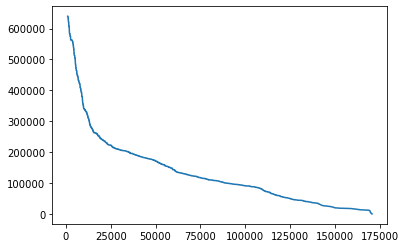

In [108]:
baskets.price.sort_values(ascending = False).reset_index(drop=True)[1000:].plot()

<AxesSubplot:>

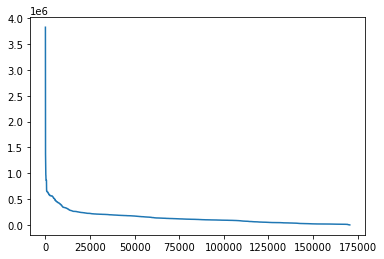

In [109]:
baskets.price.sort_values(ascending = False).reset_index(drop=True).plot()

<AxesSubplot:ylabel='Density'>

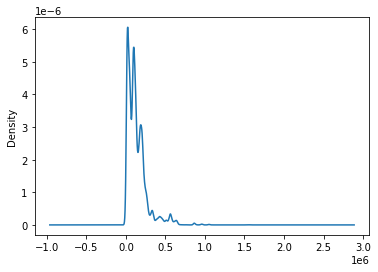

In [110]:
baskets.price.sort_values(ascending = False).reset_index(drop=True)[10:].plot.density()

<AxesSubplot:>

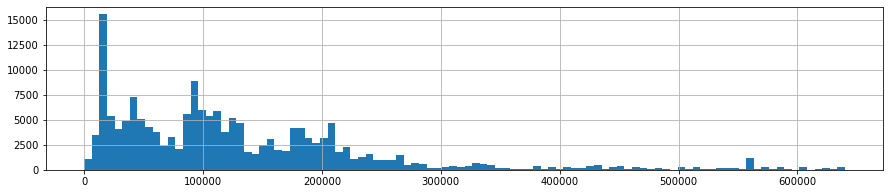

In [111]:
plt.figure(figsize=(15,3)) 
baskets.price.sort_values(ascending = False).reset_index(drop=True)[1000:].hist(bins=100)

In [112]:
baskets['datetime'] = baskets['placed_at'].apply(lambda x: datetime.fromisoformat(x))

#pandas.Series.dt is an interface on a pandas series that gives you convenient access to operations on data stored as a pandas datetime. 
baskets['date'] = baskets['datetime'].dt.date
baskets['year'] = baskets['datetime'].dt.year
baskets['month'] = baskets['datetime'].dt.month
baskets['day'] = baskets['datetime'].dt.day
baskets['hour'] = baskets['datetime'].dt.hour
baskets['weekday'] = baskets['datetime'].dt.weekday
baskets.head(3)

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,day,hour,weekday
0,72,16,2021-05-06 00:41:08.525,137,100,3.0,94.0,10,150500.0,2021-05-06 00:41:08.525,2021-05-06,2021,5,6,0,3
1,73,16,2021-05-06 00:41:08.525,137,23,13.0,32.0,2,537500.0,2021-05-06 00:41:08.525,2021-05-06,2021,5,6,0,3
2,74,16,2021-05-06 00:41:08.525,137,66,4.0,28.0,1,208000.0,2021-05-06 00:41:08.525,2021-05-06,2021,5,6,0,3


### make a column of "spent" from columns "qty" (quantity) and "price"

In [113]:
baskets["spent"] = baskets["qty"] * baskets["price"]
baskets.head(100)

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,day,hour,weekday,spent
0,72,16,2021-05-06 00:41:08.525,137,100,3.0,94.0,10,150500.0,2021-05-06 00:41:08.525,2021-05-06,2021,5,6,0,3,1505000.0
1,73,16,2021-05-06 00:41:08.525,137,23,13.0,32.0,2,537500.0,2021-05-06 00:41:08.525,2021-05-06,2021,5,6,0,3,1075000.0
2,74,16,2021-05-06 00:41:08.525,137,66,4.0,28.0,1,208000.0,2021-05-06 00:41:08.525,2021-05-06,2021,5,6,0,3,208000.0
3,129,16,2021-05-06 00:41:08.525,137,72,4.0,28.0,1,461000.0,2021-05-06 00:41:08.525,2021-05-06,2021,5,6,0,3,461000.0
4,130,16,2021-05-06 00:41:08.525,137,35,11.0,31.0,5,36500.0,2021-05-06 00:41:08.525,2021-05-06,2021,5,6,0,3,182500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,429,39,2021-05-27 08:31:06.442,33,124,11.0,27.0,150,25000.0,2021-05-27 08:31:06.442,2021-05-27,2021,5,27,8,3,3750000.0
96,430,39,2021-05-27 08:31:06.442,33,122,4.0,28.0,25,85000.0,2021-05-27 08:31:06.442,2021-05-27,2021,5,27,8,3,2125000.0
97,431,39,2021-05-27 08:31:06.442,33,101,3.0,94.0,10,145500.0,2021-05-27 08:31:06.442,2021-05-27,2021,5,27,8,3,1455000.0
98,432,39,2021-05-27 08:31:06.442,33,128,13.0,32.0,1,277000.0,2021-05-27 08:31:06.442,2021-05-27,2021,5,27,8,3,277000.0


### which merchants have the most orders

In [114]:
baskets.groupby(['merchant_id']).order_id.nunique().sort_values(ascending = False)


merchant_id
664     3918
414      504
366      315
29       306
470      285
        ... 
1247      63
163       63
123       63
1064      63
2109      63
Name: order_id, Length: 250, dtype: int64

In [115]:
baskets.groupby(['merchant_id']).spent.sum().sort_values(ascending = False)


merchant_id
664     3.947079e+09
441     1.729729e+09
366     1.724671e+09
122     1.521416e+09
322     1.514335e+09
            ...     
395     3.485955e+07
1098    3.015637e+07
1311    2.697150e+07
356     2.193075e+07
1450    1.948625e+07
Name: spent, Length: 250, dtype: float64

In [116]:
baskets.groupby(['merchant_id']).date.nunique().sort_values(ascending = False)

merchant_id
414     296
29      239
308     228
367     213
337     210
       ... 
1311     39
1247     39
1587     38
163      38
2109     37
Name: date, Length: 250, dtype: int64

In [117]:
merchants = baskets.groupby(['merchant_id']).agg({'spent': 'sum', 'order_id': 'nunique', 'date': 'nunique', 'sku_id':'nunique', 'top_cat_id':'nunique', 'sub_cat_id':'nunique'}).reset_index()
#merchants[merchants.merchant_id == 488]

<AxesSubplot:>

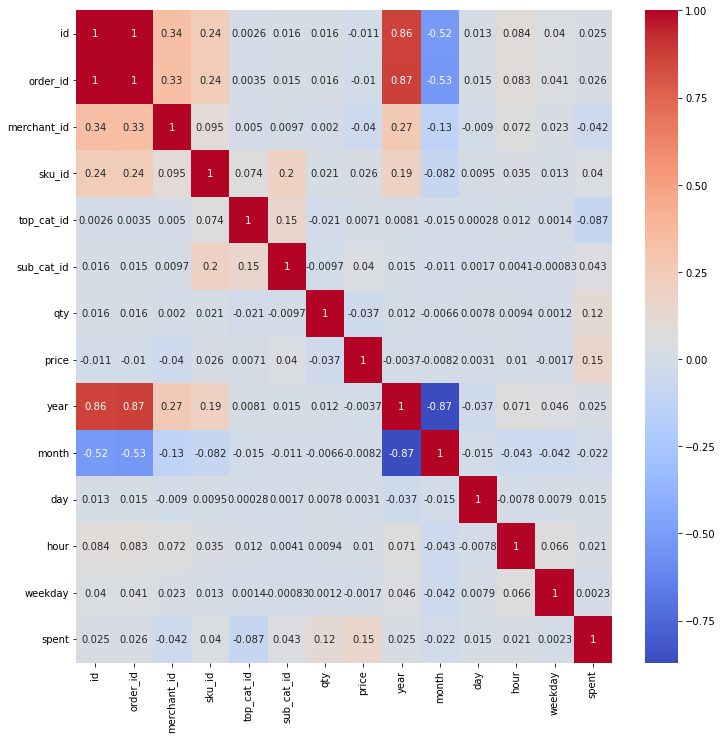

In [118]:
#Correlation plot
plt.figure(figsize=(12,12)) 
sns.heatmap(baskets.corr(),annot=True, cmap='coolwarm')


<AxesSubplot:>

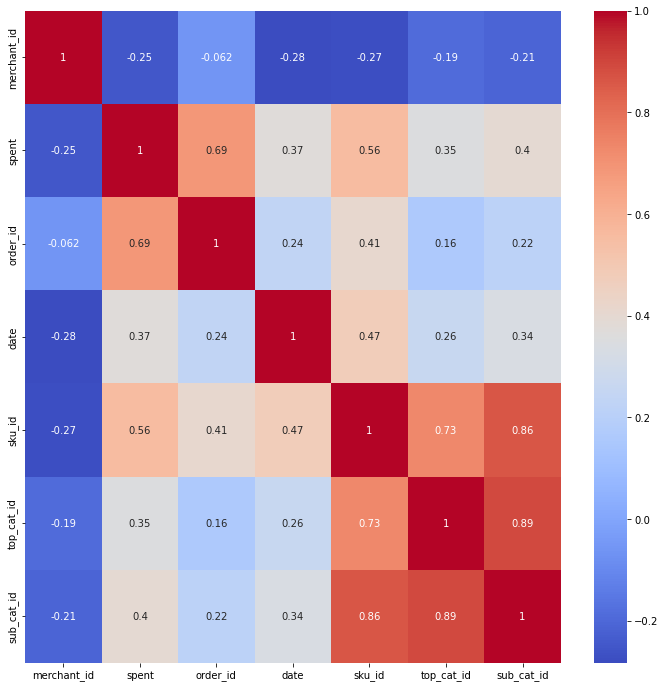

In [119]:
#Correlation plot
plt.figure(figsize=(12,12)) 
sns.heatmap(merchants.corr(),annot=True, cmap='coolwarm')


### for merchant 488, what are the top SKU in terms of quantities

In [120]:
df = baskets[baskets['merchant_id']==488].groupby(by=['sku_id']).sum().qty.sort_values(ascending = False).reset_index()
df

,sku_id,qty


### study merchant 488 on its behavior on top SKUs

In [121]:
baskets[(baskets['merchant_id'] ==488) & (baskets['sku_id'].isin(df['sku_id'].head(3)))]

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,day,hour,weekday,spent


### this merchant's top sku purchased are 
 -  vegetable oils - top cat 4 is "ingredients" (bahan masakan) and sub cat 57 is "grilled fish cake" )
 -  beer  - top cat 3 is "food material" (bahan makanan) and sub cat 10 is "beer" (bir))

In [122]:
df = baskets[baskets.merchant_id==488].groupby(['sku_id'], as_index=False).agg({'month': ['nunique', 'min', 'max']}).reset_index()

In [123]:
baskets.groupby(['year','month']).sum().spent

year  month
2021  5        5.808040e+07
      6        3.400415e+08
      7        1.061440e+09
      8        1.586051e+09
      9        2.625411e+09
      10       6.385934e+09
      11       7.725058e+09
      12       7.380370e+09
2022  1        7.569611e+09
      2        8.301569e+09
      3        8.498531e+09
      4        4.467511e+09
      5        3.862370e+09
      6        4.557325e+09
      7        3.865196e+09
      8        1.851670e+09
Name: spent, dtype: float64

<AxesSubplot:xlabel='date'>

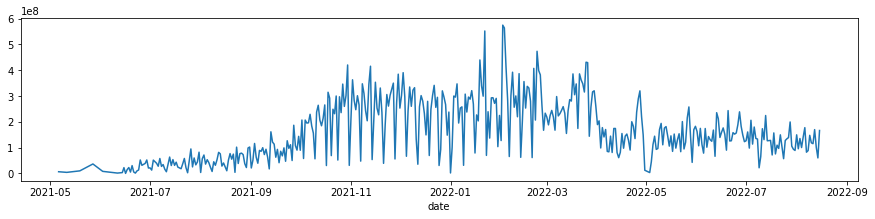

In [124]:
plt.figure(figsize=(15,3)) 
baskets.groupby(['date']).sum().spent.plot()

<AxesSubplot:xlabel='date'>

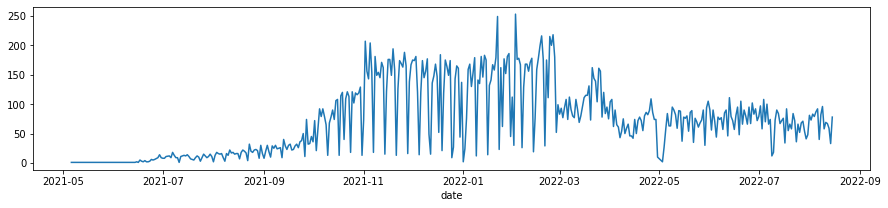

In [125]:
plt.figure(figsize=(15,3)) 
baskets.groupby(['date']).nunique().order_id.plot()

<AxesSubplot:xlabel='date'>

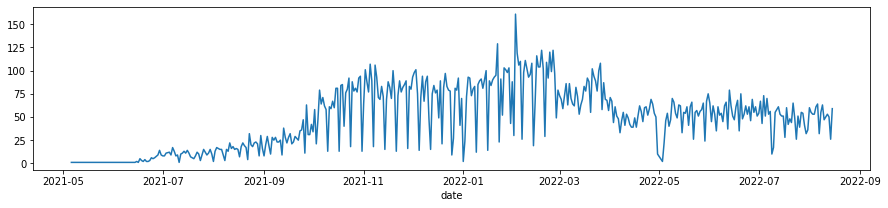

In [126]:
plt.figure(figsize=(15,3)) 
baskets.groupby(['date']).nunique().merchant_id.plot()

<AxesSubplot:xlabel='date'>

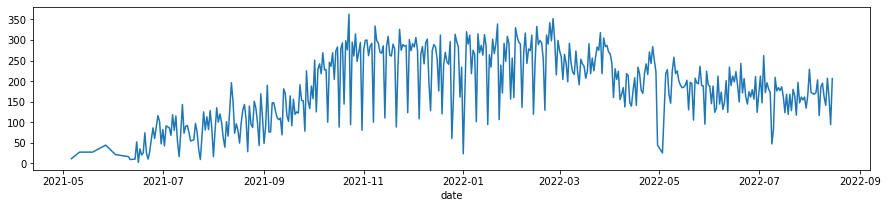

In [139]:
plt.figure(figsize=(15,3)) 
baskets.groupby(['date']).nunique().sku_id.plot()

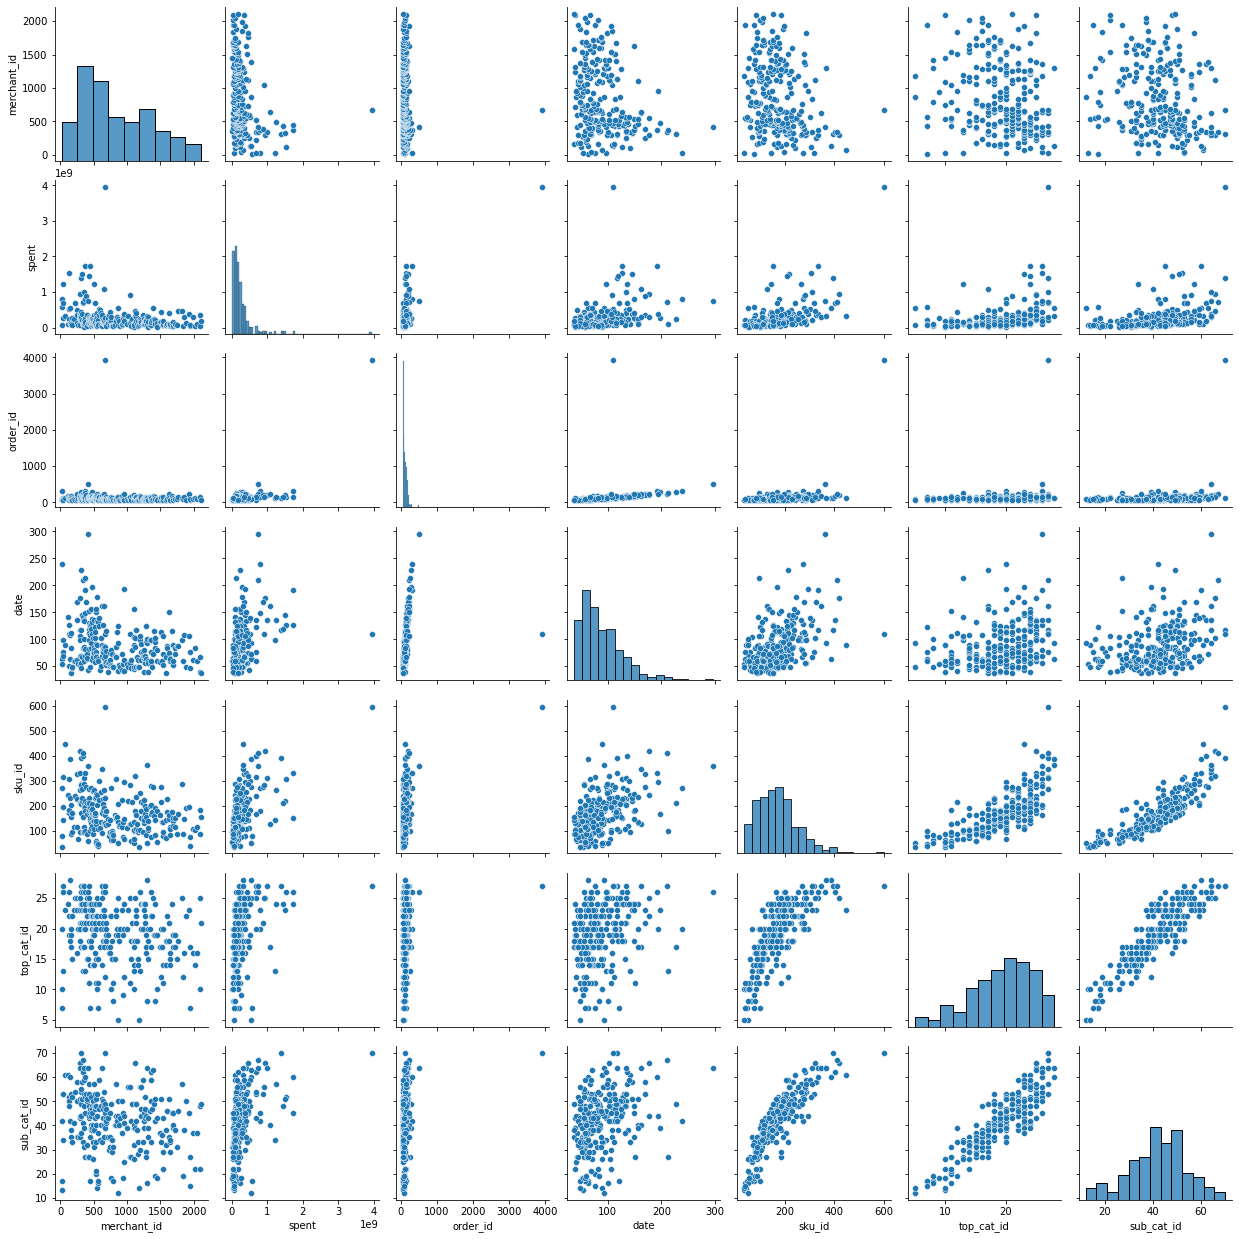

In [128]:
sns.pairplot(merchants)

 - for each merchant, how many items did they buy on December 31, 2021?
 - what did the merchant_id buy? on December 31, 2021?

We can see that there are 2208 null values in 'top_cat_id' and 'sub_cat_id'.

In [129]:
#Removing these null values
baskets.dropna(inplace=True)

In [130]:
baskets.isnull().sum()

id             0
order_id       0
placed_at      0
merchant_id    0
sku_id         0
top_cat_id     0
sub_cat_id     0
qty            0
price          0
datetime       0
date           0
year           0
month          0
day            0
hour           0
weekday        0
spent          0
dtype: int64

In [131]:
#Counting the frequency
freq = baskets['merchant_id'].value_counts()
print(freq)

664     9498
337     2900
29      2839
290     2417
414     2289
        ... 
1940     166
1545     165
567      164
419      138
25       123
Name: merchant_id, Length: 250, dtype: int64


In [132]:
frequency_df = baskets.groupby(
    by=['merchant_id'], as_index=False)['date'].count()
frequency_df.columns = ['merchant_id', 'Frequency']
frequency_df.head()

,merchant_id,Frequency
0,17,466
1,25,123
2,29,2839
3,32,812
4,33,1185


In [133]:
merchant_sku = baskets.groupby(['merchant_id', 'sku_id', 'month'], as_index= True).agg({'count'})
merchant_sku

id order_id placed_at top_cat_id sub_cat_id   qty  \
                         count    count     count      count      count count   
merchant_id sku_id month                                                        
17          213    12        1        1         1          1          1     1   
            231    10        1        1         1          1          1     1   
                   12        1        1         1          1          1     1   
            263    1         5        5         5          5          5     5   
                   2         2        2         2          2          2     2   
...                        ...      ...       ...        ...        ...   ...   
2109        1572   8         1        1         1          1          1     1   
            1573   7         1        1         1          1          1     1   
            1593   6         1        1         1          1          1     1   
            1594   6         1        1         1          1          1     1   
                   8         1        1         1          1          1     1   

                         price datetime  date  year   day  hour weekday spent  
                         count    count count count count count   count count  
merchant_id sku_id month                                                       
17          213    12        1        1     1     1     1     1       1     1  
            231    10        1        1     1     1     1     1       1     1  
                   12        1        1     1     1     1     1       1     1  
            263    1         5        5     5     5     5     5       5     5  
                   2         2        2     2     2     2     2       2     2  
...                        ...      ...   ...   ...   ...   ...     ...   ...  
2109        1572   8         1        1     1     1     1     1       1     1  
            1573   7         1        1     1     1     1     1       1     1  
            1593   6         1        1     1     1     1     1       1     1  
            1594   6         1        1     1     1     1     1       1     1  
                   8         1        1     1     1     1     1       1     1  

[105147 rows x 14 columns]

In [134]:
merchant_sku = baskets.groupby(['merchant_id', 'sku_id'], as_index= True).agg({'count'})
merchant_sku

id order_id placed_at top_cat_id sub_cat_id   qty price  \
                   count    count     count      count      count count count   
merchant_id sku_id                                                              
17          213        1        1         1          1          1     1     1   
            231        2        2         2          2          2     2     2   
            263       29       29        29         29         29    29    29   
            266        2        2         2          2          2     2     2   
            267        2        2         2          2          2     2     2   
...                  ...      ...       ...        ...        ...   ...   ...   
2109        1565       1        1         1          1          1     1     1   
            1572       3        3         3          3          3     3     3   
            1573       1        1         1          1          1     1     1   
            1593       1        1         1          1          1     1     1   
            1594       2        2         2          2          2     2     2   

                   datetime  date  year month   day  hour weekday spent  
                      count count count count count count   count count  
merchant_id sku_id                                                       
17          213           1     1     1     1     1     1       1     1  
            231           2     2     2     2     2     2       2     2  
            263          29    29    29    29    29    29      29    29  
            266           2     2     2     2     2     2       2     2  
            267           2     2     2     2     2     2       2     2  
...                     ...   ...   ...   ...   ...   ...     ...   ...  
2109        1565          1     1     1     1     1     1       1     1  
            1572          3     3     3     3     3     3       3     3  
            1573          1     1     1     1     1     1       1     1  
            1593          1     1     1     1     1     1       1     1  
            1594          2     2     2     2     2     2       2     2  

[43470 rows x 15 columns]

In [135]:
baskets.price.median()

106000.0

Text(149319.24137393569, 32463.585000000003, 'Mean: 135744.76')

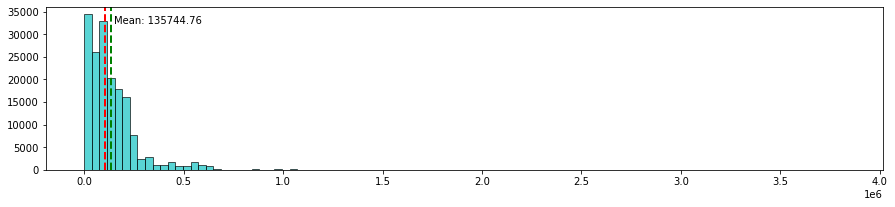

In [136]:
plt.figure(figsize=(15,3)) 
result = plt.hist(baskets.price, bins=100, color='c', edgecolor='k', alpha=0.65)
plt.axvline(baskets.price.mean(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(baskets.price.median(), color='r', linestyle='dashed', linewidth=2)


min_ylim, max_ylim = plt.ylim()
plt.text(baskets.price.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(baskets.price.mean()))

<AxesSubplot:>

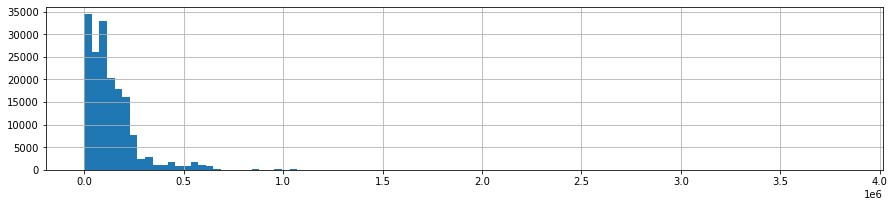

In [137]:
plt.figure(figsize=(15,3)) 
baskets.price.sort_values(ascending = False).reset_index(drop=True).hist(bins=100)

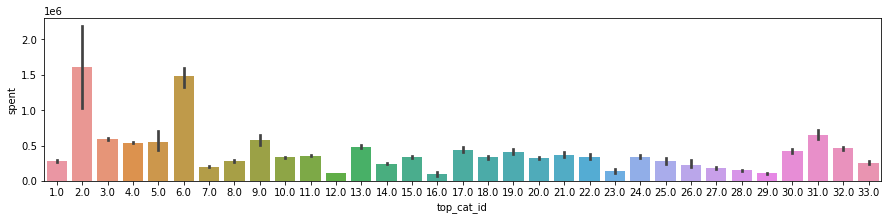

In [138]:
plt.figure(figsize=(15,3)) 
ax = sns.barplot(x="top_cat_id", y="spent", data=baskets)

### for 10% sample data, top cat 7 is "makanan bayi", translated as "baby food", hmmm, is this right?
### for top 250 sample, top cat 6 is "korek api gas", translated as "gas lighter", hmmm, is it correct?